In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
#import statsmodels.robust as robust
from statsmodels import robust
import seaborn as sb
from scipy.stats.stats import pearsonr

In [2]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])





In [3]:
data1 = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])
print(data1)

     Col1 Col2
Row1    1    2
Row2    3    4


In [4]:
population1 = {'state':['Albania','Alaska','Arizona','Arkanas','Califonia','Coloroda','Connecticut','Delaware'],
             'Population':[4779736,710231,6392017,2915918,37253956,5029196,3574097,897934],
             'Muderrate' : [5.7,5.6,4.7,5.6,4.4,2.8,2.4,5.8],'Abbreviation' : ['AL','AK','AZ','AR','CA','CO','CT','DE']}

df = pd.DataFrame(population1)
df

df['Population'].mean()

stats.trim_mean(df['Population'],0.1)


7694135.625

In [22]:
 
stats.trim_mean(df['Population'],0.1)
 

7694135.625

In [25]:
df["Population"].median()

4176916.5

In [5]:
np.average(df['Muderrate'],weights=df['Population'])



4.376359279149048

In [6]:
import wquantiles 
wquantiles.median(df['Muderrate'],weights = df['Population'])

4.448750497554494

In [43]:
! pip install wquantiles

In [7]:
#standard deviation.
print("Standartd deviation = ", df['Population'].std())

#quantiles to determine IQR
print("IQR = ",df['Population'].quantile(0.75) - df['Population'].quantile(0.25))

#ROBUST MAD

print("ROBUST MAD", robust.scale.mad(df['Population']))

Standartd deviation =  12105745.29585633
IQR =  2958479.25
ROBUST MAD 2576836.044572552


In [79]:
#percentile and boxplot

df['Muderrate'].quantile([0.05,0.25,0.5,0.75,0.95])

boxplot(df[['Population']]/1000000,ylab = 'Population(millions)')

0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Muderrate, dtype: float64

Text(0, 0.5, 'Population(millions)')

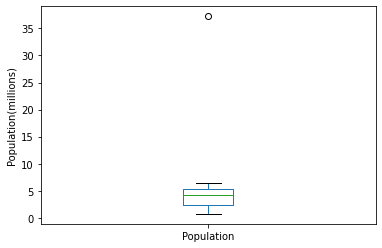

In [8]:
#boxplot
ax = (df['Population']/1000000).plot.box()
ax.set_ylabel('Population(millions)')

In [7]:
binnedpopulation = pd.cut(df['Population'],10)
binnedpopulation.value_counts()

(673687.275, 4364603.5]     4
(4364603.5, 8018976.0]      3
(33599583.5, 37253956.0]    1
(29945211.0, 33599583.5]    0
(26290838.5, 29945211.0]    0
(22636466.0, 26290838.5]    0
(18982093.5, 22636466.0]    0
(15327721.0, 18982093.5]    0
(11673348.5, 15327721.0]    0
(8018976.0, 11673348.5]     0
Name: Population, dtype: int64

Text(0, 0.5, 'numbers')

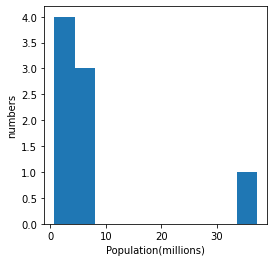

In [13]:
#histogram
ax = (df['Population']/1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population(millions)')
ax.set_ylabel('numbers')

In [17]:
ax = df['Muderrate'].plot.hist(density = True, xlim[0,12],bins = range(1,12)),
df['Muderrate'].plot.density(ax=ax),
ax.set_xlabel('Muder Rate(per 100,000)')

SyntaxError: positional argument follows keyword argument (<ipython-input-17-3775d8022233>, line 1)

In [7]:
dfw = {'Carrier':[23.02],
             'ATC':[30.02],
             'Weather' : [4.03],'Security' : [0.12],'Inbound' : [42.43]}

DWF = pd.DataFrame(dfw)
DWF.transpose()

,0
Carrier,23.02
ATC,30.02
Weather,4.03
Security,0.12
Inbound,42.43


Text(0, 0.5, 'count')

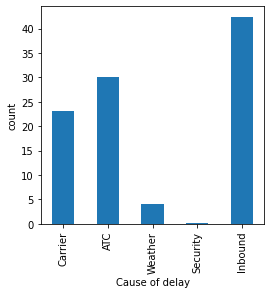

In [14]:
ax = DWF.transpose().plot.bar(figsize = (4,4), legend = False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('count')

In [2]:
correlation = {'T' : [ 1.000,0.475,0.328,0.678,0.279],
'CTL' : [0.475,1.000,0.420,0.417,0.287],
'FTR' : [0.328,0.420,1.000,0.287,0.260],
'VZ' : [0.678,0.417,0.287,1.000,0.242],
'LVLT' : [0.279,0.287,0.260,0.242,1.000]}
correlation

{'T': [1.0, 0.475, 0.328, 0.678, 0.279],
 'CTL': [0.475, 1.0, 0.42, 0.417, 0.287],
 'FTR': [0.328, 0.42, 1.0, 0.287, 0.26],
 'VZ': [0.678, 0.417, 0.287, 1.0, 0.242],
 'LVLT': [0.279, 0.287, 0.26, 0.242, 1.0]}

In [5]:
Correlation = pd.DataFrame(correlation)
Correlation.cov()


,T,CTL,FTR,VZ,LVLT
T,0.086804,0.003978,-0.036054,0.066820,-0.049464
CTL,0.003978,0.076831,-0.000711,-0.004478,-0.039577
FTR,-0.036054,-0.000711,0.095137,-0.042493,-0.036927
VZ,0.066820,-0.004478,-0.042493,0.099358,-0.054456
LVLT,-0.049464,-0.039577,-0.036927,-0.054456,0.107762


In [30]:
Correlation.corr(method='pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.048708,-0.396738,0.719513,-0.511429
CTL,0.048708,1.000000,-0.008310,-0.051250,-0.434951
FTR,-0.396738,-0.008310,1.000000,-0.437061,-0.364695
VZ,0.719513,-0.051250,-0.437061,1.000000,-0.526277
LVLT,-0.511429,-0.434951,-0.364695,-0.526277,1.000000


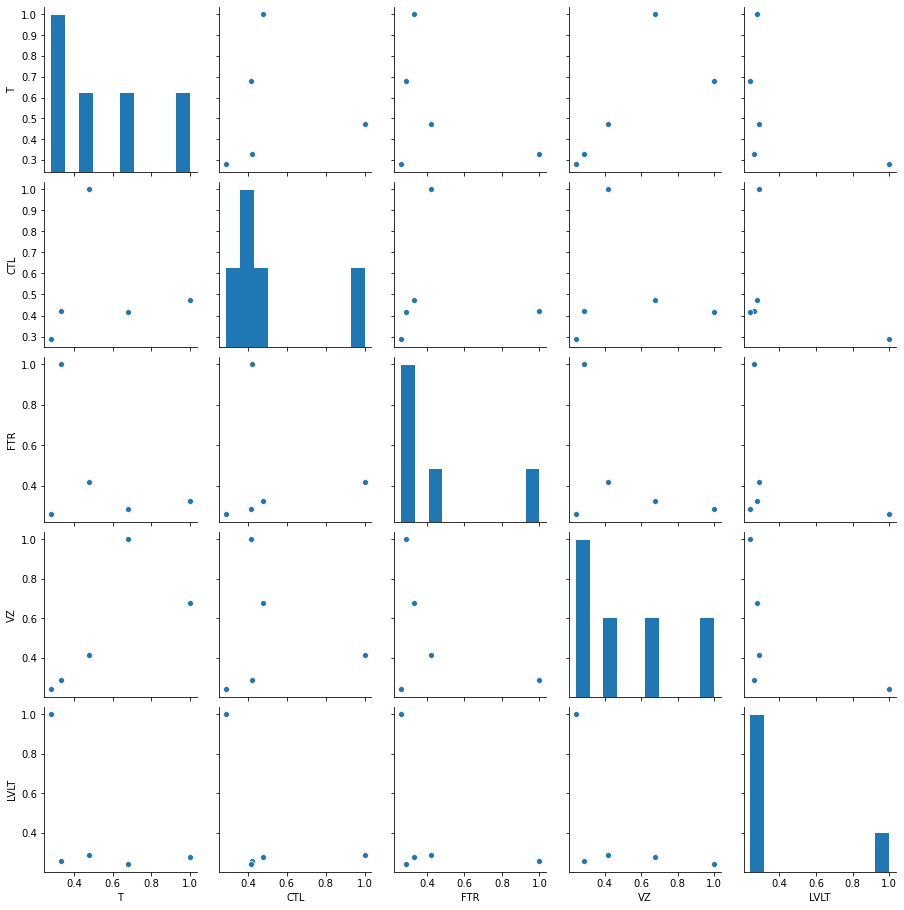

In [31]:
sb.pairplot(Correlation)

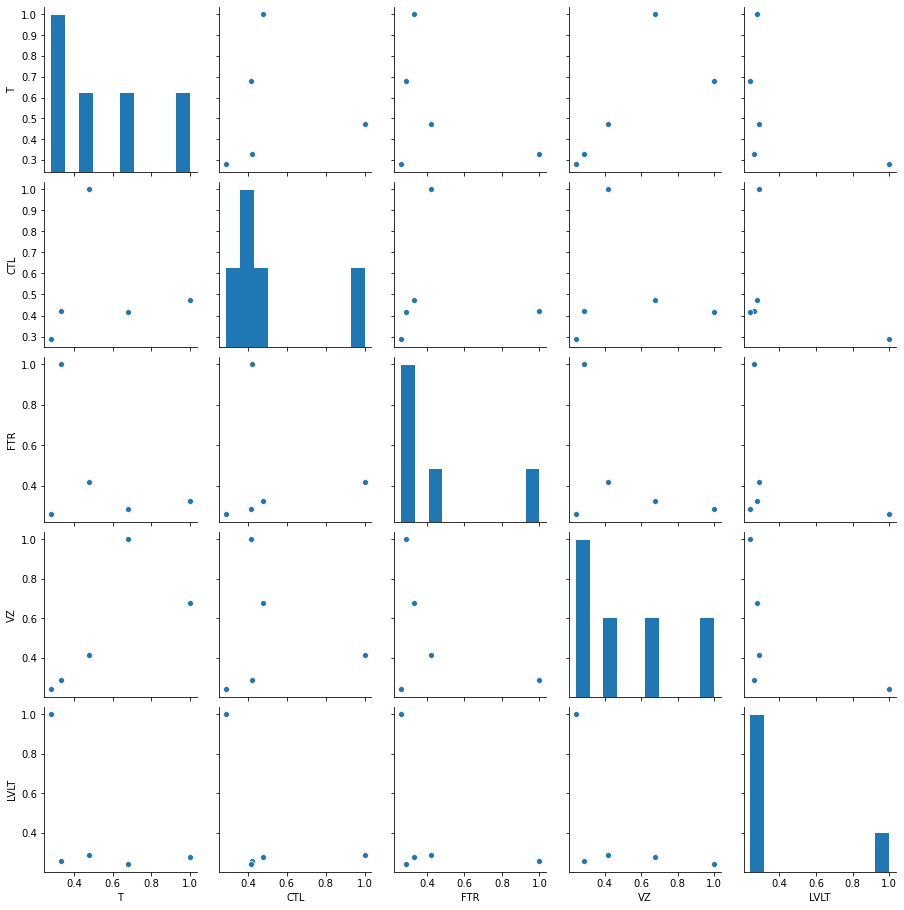

In [35]:
x = Correlation [['T','CTL','FTR','VZ','LVLT']]
sb.pairplot(x)

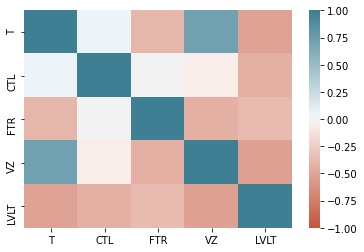

In [37]:
sb.heatmap(Correlation.corr(),vmin = -1, vmax = 1,cmap = sb.diverging_palette(20,220,as_cmap = True))

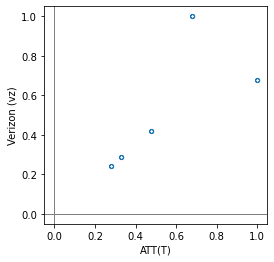

In [6]:
#Scatterplot

ax = Correlation.plot.scatter(x = 'T',y = 'VZ',figsize = (4,4),marker ='$\u25ef$')
ax.set_xlabel('ATT(T)')
ax.set_ylabel('Verizon (vz)')
ax.axhline(0,color = 'grey',lw = 1)
ax.axvline(0,color = 'grey',lw = 1)

In [10]:
fifa = pd.read_csv('fifa_data.csv')
fifa

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [9]:
#hexagon
fifa.shape

(18207, 89)

Text(0, 0.5, 'GKDiving')

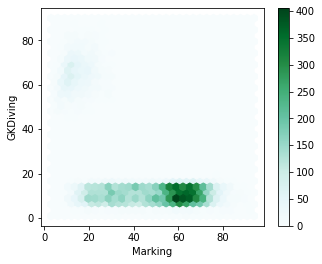

In [11]:



ax = fifa.plot.hexbin(x = 'Marking',y = 'GKDiving',gridsize = 30,sharex = False, figsize =(5,4))
ax.set_xlabel('Marking')
ax.set_ylabel('GKDiving')


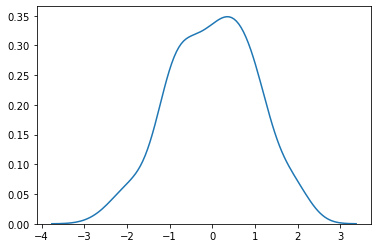

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(200)
res = sn.kdeplot(data)
plt.show()

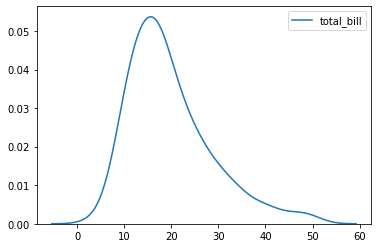

In [69]:
tips=sn.load_dataset("tips")
ax = sn.kdeplot(tips.total_bill)


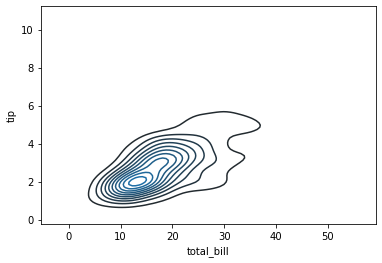

In [67]:
ax = sn.kdeplot(tips.total_bill,tips.tip)

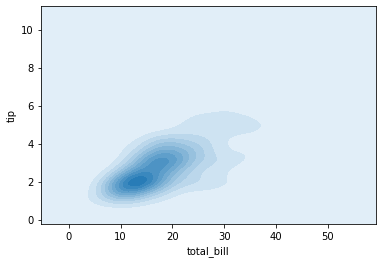

In [68]:
ax = sn.kdeplot(tips.total_bill,tips.tip,shade=True)

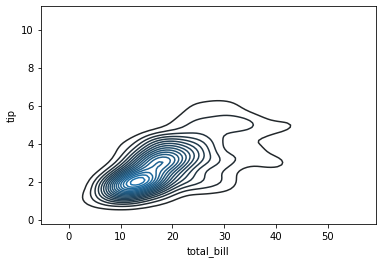

In [70]:
ax = sn.kdeplot(tips.total_bill,tips.tip,n_levels = 20)

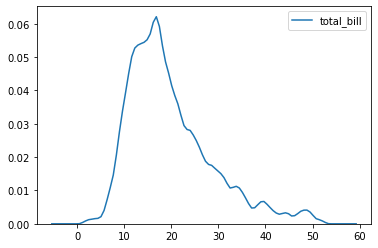

In [76]:
ax = sn.kdeplot(tips.total_bill,kernel='biw',bw='scott')

In [72]:
sn.kdeplot?

In [ ]:
'''The kernel is the server that enables Python programmers to run cells within Notebook. 
You typically see the kernel commands in a separate command or terminal window. 
The kernel displays its commands in a separate Jupyter Notebook window.'''

'''A rugplot is a graph that places a dash horizontally with each occurrence of an item in a dataset. 
Areas where there is great occurrence of an item see a greater density of these dashes.'''



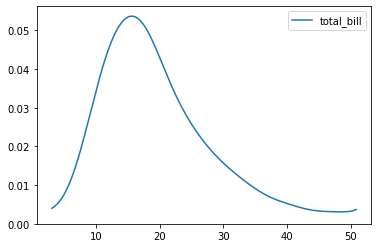

In [80]:
ax = sn.kdeplot(tips.total_bill,cut = 0)

In [ ]:
'''Pandas cut() function is used to separate the array elements into different bins . 
The cut function is mainly used to perform statistical analysis on scalar data.'''

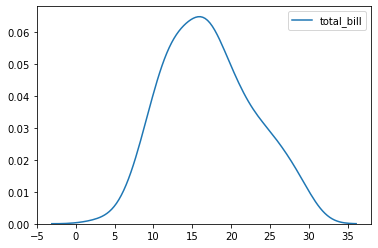

In [82]:
ax = sn.kdeplot(tips.total_bill,clip = (0,30))

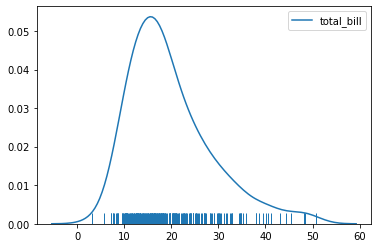

In [83]:
sn.kdeplot(tips.total_bill)
sn.rugplot(tips.total_bill)

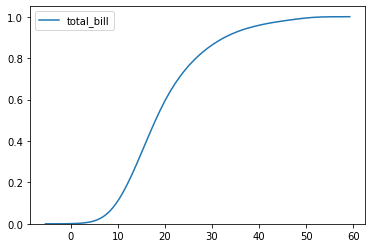

In [84]:
sn.kdeplot(tips.total_bill,cumulative= True)

In [23]:
loan_income = pd.read_csv('loans_income.csv')

loan_income

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [24]:
#take a simple random sample
sample_data = pd.DataFrame({
    'income'  : loan_income.x.sample(1000),'type' : 'Data',
})

In [12]:
#take a sample mean of 5 values

sample_data05 =  pd.DataFrame({
    'income'  : [loan_income.x.sample(5).mean() for _ in range(1000)],'type' : 'mean of 5',
})

In [13]:
#take a sample mean of 5 values

sample_data20 =  pd.DataFrame({
    'income'  : [loan_income.x.sample(20).mean() for _ in range(1000)],'type' : 'mean of 20',
})

In [14]:
#bind the data.frame and convert type to factor

result = pd.concat([sample_data,sample_data05,sample_data20])

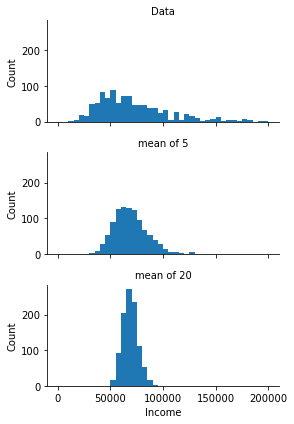

In [25]:
#plot the histograms

g = sb.FacetGrid(result,col = 'type',col_wrap = 1,height = 2,aspect = 2)
g.map(plt.hist,'income',range = [0,200000],bins = 40)
g.set_axis_labels('Income','Count')
g.set_titles('{col_name}')




In [26]:
from sklearn.utils import resample
result = []
for nrepeat in range(1000):
    sample = resample(loan_income)
    result.append(sample.median())
result = pd.Series(result)
print('bootstrap Statistics')
print(f'original : {loan_income.x.median()}')
print(f'bias : {result.median() - loan_income.x.median() }')
print(f'std.error: {result.std()}')



bootstrap Statistics
original : 62000.0
bias : 0.0
std.error: 203.112950765131


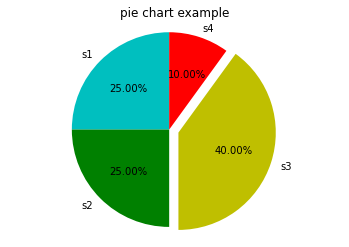

In [5]:
labels = 's1','s2','s3','s4'

sections = [25,25,40,10]

colors = ['c','g','y','r']



plt.pie(sections,labels=labels,colors = colors,
       startangle = 90,
       explode = (0,0,0.1,0),
       autopct = ('%1.2f%%'))

plt.axis("equal")
plt.title("pie chart example")
plt.show()